In [4]:
import pandas as pd
csv_path=('C:\\Users\\Aslı Nur Karaman\\Desktop\\DiseasePredictionCodes\\alzheimer.csv')
alzheimer_data= pd.read_csv(csv_path)
alzheimer_data['M/F'] = alzheimer_data['M/F'].map({'M': 0, 'F': 1})
alzheimer_data.rename(columns={'M/F': 'M_F'}, inplace=True)
alzheimer_data.Group = [0 if each == "Nondemented" else 1 for each in alzheimer_data.Group]
mean_ses = alzheimer_data['SES'].mean()
alzheimer_data['SES'].fillna(mean_ses, inplace=True)
mean_mmse = alzheimer_data['MMSE'].mean()
alzheimer_data['MMSE'].fillna(mean_mmse, inplace=True)
class_distribution = alzheimer_data['Group'].value_counts()
print(class_distribution)
print(alzheimer_data.head())

Group
0    190
1    183
Name: count, dtype: int64
   Group  M_F  Age  EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF
0      0    0   87    14  2.000000  27.0  0.0  1987  0.696  0.883
1      0    0   88    14  2.000000  30.0  0.0  2004  0.681  0.876
2      1    0   75    12  2.460452  23.0  0.5  1678  0.736  1.046
3      1    0   76    12  2.460452  28.0  0.5  1738  0.713  1.010
4      1    0   80    12  2.460452  22.0  0.5  1698  0.701  1.034


In [5]:
print(alzheimer_data.shape)

(373, 10)


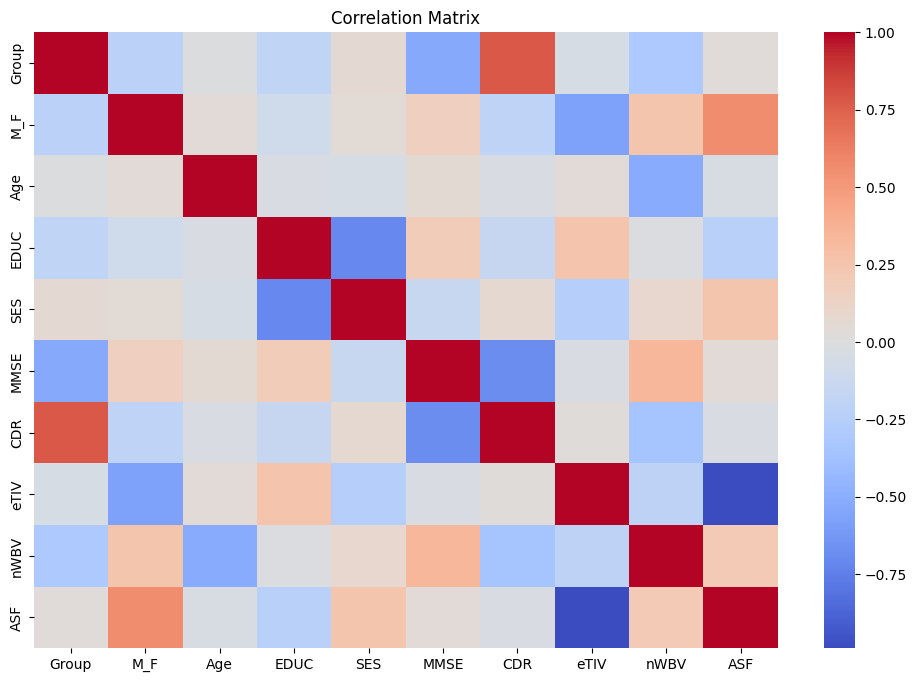

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = alzheimer_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

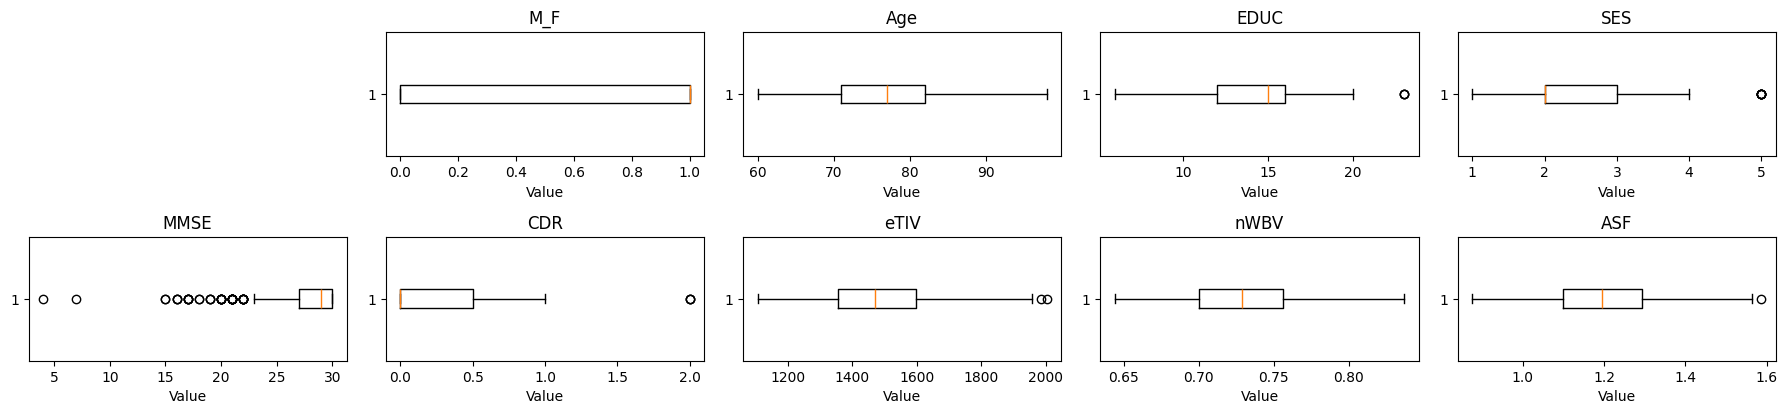

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
for i, feature in enumerate(alzheimer_data.columns):
    if feature != 'Group':
        plt.subplot(6, 5, i + 1)
        plt.boxplot(alzheimer_data[feature], vert=False)
        plt.title(feature)
        plt.xlabel("Value")
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X = alzheimer_data.drop("Group", axis=1)
Y = alzheimer_data["Group"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Eğitim seti boyutu:", X_train.shape[0])
print("Test seti boyutu:", X_test.shape[0])

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


train_set = X_train.copy()
train_set['Group'] = Y_train

test_set = X_test.copy()
test_set['Group'] = Y_test

overlap = pd.merge(train_set, test_set, how='inner', on=train_set.columns.tolist())

if not overlap.empty:
    print("Overlap:")
    print(overlap)
else:
    print("No overlap.")


Eğitim seti boyutu: 298
Test seti boyutu: 75
Accuracy: 0.9066666666666666
Precision: 0.9736842105263158
Recall: 0.8604651162790697
F1 Score: 0.9135802469135803

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.97      0.86      0.91        43

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.92      0.91      0.91        75

Eğitim ve test setlerinde overlap bulunmamaktadır.
